# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [115]:
#import libraries for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import Libraries for Model and train it
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [3]:
df = pd.read_csv('RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [127]:
df.shape

(12316, 32)

In [128]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [129]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [131]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_vehicles_involved,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
Number_of_casualties,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


In [132]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12311    False
12312    False
12313    False
12314    False
12315    False
Length: 12316, dtype: bool

As we can see all the entries displayed are marked False, indicating that there are no duplicates of these entries. At the bottom, there is a summary that says “Length: 12316, Data Type: bool”, indicating that there are 12,316 rows in total and that the type of this string is boolean.

In [133]:
df.isnull

<bound method DataFrame.isnull of            Time Day_of_week Age_band_of_driver Sex_of_driver  \
0      17:02:00      Monday              18-30          Male   
1      17:02:00      Monday              31-50          Male   
2      17:02:00      Monday              18-30          Male   
3       1:06:00      Sunday              18-30          Male   
4       1:06:00      Sunday              18-30          Male   
...         ...         ...                ...           ...   
12311  16:15:00   Wednesday              31-50          Male   
12312  18:00:00      Sunday            Unknown          Male   
12313  13:55:00      Sunday            Over 51          Male   
12314  13:55:00      Sunday              18-30        Female   
12315  13:55:00      Sunday              18-30          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
0       Above high school                Employee              1-2yr   
1      Junior high school                Employee    

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [138]:
#Here is for find the missing values from each column
print(df.isnull().sum())

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [139]:
#Here for find the total number of missing values from the entire dataset
df.isnull().sum().sum() 

20057

In [140]:
#Here for deleting the entire row 
df = df.dropna(axis=0)
df.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

In [12]:
columns_to_fill = ['Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle',
                   'Owner_of_vehicle', 'Service_year_of_vehicle', 
                   'Defect_of_vehicle', 'Area_accident_occured', 
                   'Lanes_or_Medians', 'Types_of_Junction',
                   'Road_surface_type', 'Type_of_collision',
                   'Work_of_casuality', 'Vehicle_movement', 'Fitness_of_casuality', 'Road_allignment']

# Here fill the missing values in df[columns_to_fill] using df
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mode().iloc[0])

In [14]:
X = df.drop('Accident_severity', axis = 1)
y = df['Accident_severity']

In [15]:
#Here is for divided the data into two groups the numerical and the categorical columns
numerical_columns = X[['Number_of_vehicles_involved','Number_of_casualties']]
categorical_columns = X[['Sex_of_driver','Day_of_week','Age_band_of_driver','Educational_level','Vehicle_driver_relation','Driving_experience','Type_of_vehicle','Owner_of_vehicle','Service_year_of_vehicle','Defect_of_vehicle','Area_accident_occured','Lanes_or_Medians','Road_allignment','Types_of_Junction','Road_surface_type','Road_surface_conditions','Light_conditions','Weather_conditions','Type_of_collision','Vehicle_movement','Casualty_class','Sex_of_casualty','Age_band_of_casualty','Casualty_severity','Work_of_casuality','Fitness_of_casuality','Pedestrian_movement','Cause_of_accident']]

In [18]:
numberic_Features = ['Number_of_vehicles_involved','Number_of_casualties']
#Here is about fills the missing values using the mean, Scaler is for converts numeric data to standard scale
numberic_Transformer = Pipeline(steps = [('Imputer',SimpleImputer(strategy = 'mean')),
                                         ('scaler',StandardScaler())])

#Here is specifies the categorical data columns used in the analysis.
categorical_features = ['Sex_of_driver','Day_of_week','Age_band_of_driver','Educational_level','Vehicle_driver_relation','Driving_experience','Type_of_vehicle','Owner_of_vehicle','Service_year_of_vehicle','Defect_of_vehicle','Area_accident_occured','Lanes_or_Medians','Road_allignment','Types_of_Junction','Road_surface_type','Road_surface_conditions','Light_conditions','Weather_conditions','Type_of_collision','Vehicle_movement','Casualty_class','Sex_of_casualty','Age_band_of_casualty','Casualty_severity','Work_of_casuality','Fitness_of_casuality','Pedestrian_movement','Cause_of_accident']
#Here is peplaces the missing values with constant values, Encodes is for categorical data using OneHotEncoder ignoring unknown values
cat_Transformer = Pipeline(steps = [('Imputer',SimpleImputer(strategy = 'constant')),
                                    ('encoder',OneHotEncoder(handle_unknown = 'ignore'))])

#Here is for combines numerical and categorical processors into a single preprocessor. It is used to transform and prepare a dataset before applying analysis or classification models.

preprocessor = ColumnTransformer(transformers = [('num',numberic_Transformer,numberic_Features),
                                                 ('cat',cat_Transformer,categorical_features)])

In [19]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('Imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Number_of_vehicles_involved',
                                  'Number_of_casualties']),
                                ('cat',
                                 Pipeline(steps=[('Imputer',
                                                  SimpleImputer(strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex_of_driver', 'Day_of_week',
                                  'Age_band_of_driver', 'Educa...
                                  'Defect_of_vehicle', 'Area_accident_occured',
                                  'Lanes_or_Medians', 'Road_allignment',
                                  'Types_of_Junction', 'Road_surface_type',
                                  'Road_surface_conditions', 'Light_conditions',
                                  'Weather_conditions', 'Type_of_collision',
                                  'Vehicle_movement', 'Casualty_class',
                                  'Sex_of_casualty', 'Age_band_of_casualty',
                                  'Casualty_severity', 'Work_of_casuality',
                                  'Fitness_of_casuality', 'Pedestrian_movement',
                                  'Cause_of_accident'])])

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

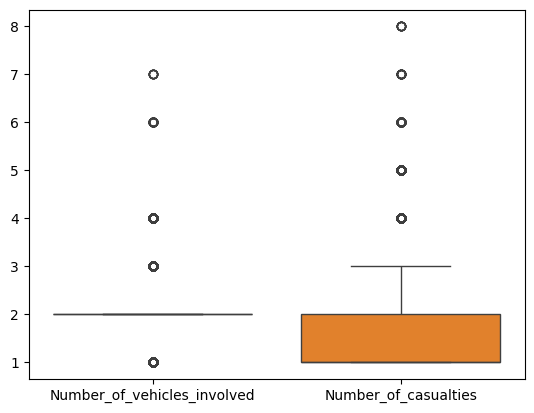

In [20]:
sns.boxplot(df)
print(df.isnull().sum())

In [85]:
# Fit and transform the data using the preprocessor
X_preprocessed = preprocessor.fit_transform(X)
categorical_feature_names = preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical_features)
feature_names = numberic_Features + list(categorical_feature_names)

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

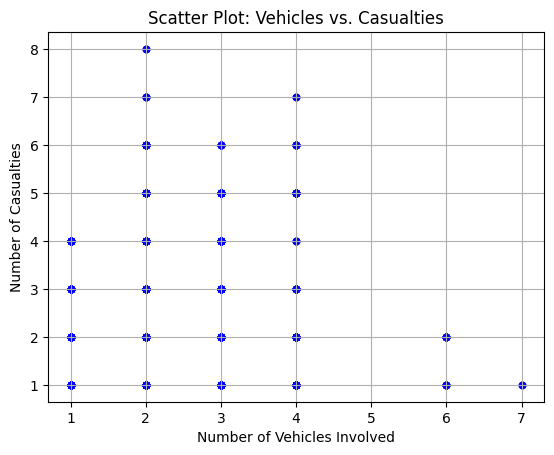

In [25]:
#Here is graph shows the relationship between the number of vehicles involved in an accident and the number of casualties
numerical_columns = X[['Number_of_vehicles_involved', 'Number_of_casualties']]
numerical_columns.plot.scatter(x='Number_of_vehicles_involved', y='Number_of_casualties', c='blue', alpha=0.5)
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Number of Casualties')
plt.title('Scatter Plot: Vehicles vs. Casualties')
plt.grid(True)
plt.show()

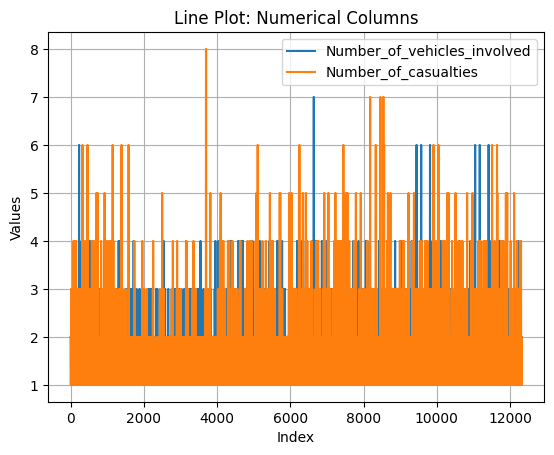

In [24]:
numerical_columns.plot.line()
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Line Plot: Numerical Columns')
plt.grid(True)
plt.show()

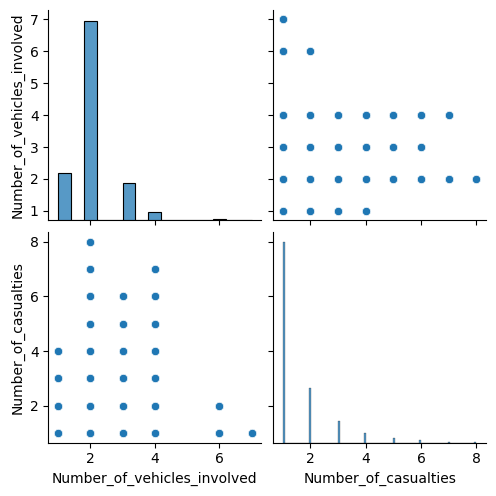

In [22]:
sns.pairplot(X)

In [29]:
print(X.dtypes)

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [35]:
seed = 42
np.random.seed(seed)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [55]:
x_train.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident
6571,17:19:00,Thursday,Unknown,Male,Elementary school,Employee,Below 1yr,Public (13?45 seats),Owner,Unknown,...,4,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the left
7945,19:41:00,Thursday,18-30,Male,Junior high school,Owner,5-10yr,Automobile,Owner,Unknown,...,1,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,No priority to vehicle
9430,20:10:00,Friday,31-50,Male,High school,Employee,1-2yr,Public (12 seats),Governmental,Unknown,...,3,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving carelessly
549,13:09:00,Tuesday,31-50,Male,Junior high school,Owner,5-10yr,Automobile,Owner,Unknown,...,1,Going straight,Passenger,Female,18-30,3,Driver,Normal,Not a Pedestrian,No distancing
9290,15:50:00,Thursday,Unknown,Female,Junior high school,Employee,2-5yr,Automobile,Owner,Unknown,...,1,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs


In [56]:
y_train.head()

6571     Slight Injury
7945    Serious Injury
9430     Slight Injury
549     Serious Injury
9290    Serious Injury
Name: Accident_severity, dtype: object

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

In [148]:
#Here is about traing the data
model.fit(x_train, y_train);

C:\Users\jo141\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
y_pred = model.predict(x_test)

In [63]:
print(x_train.shape)

(9852, 31)


In [64]:
print(y_train.shape)

(9852,)


In [65]:
print(x_test.shape)

(2464, 31)


In [87]:
print(y_test.shape)

(2464,)


#### Logistic Regression

In [124]:
modelLR = Pipeline(steps = [('preprocessor',preprocessor),
                          ('Regression',LogisticRegression())])
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Number_of_vehicles_involved',
                                                   'Number_of_casualties']),
                                                 ('cat',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex_of_driver',
                                                   'Day_of_w...
                                                   'Types_of_Junction',
                                                   'Road_surface_type',
                                                   'Road_surface_conditions',
                                                   'Light_conditions',
                                                   'Weather_conditions',
                                                   'Type_of_collision',
                                                   'Vehicle_movement',
                                                   'Casualty_class',
                                                   'Sex_of_casualty',
                                                   'Age_band_of_casualty',
                                                   'Casualty_severity',
                                                   'Work_of_casuality',
                                                   'Fitness_of_casuality',
                                                   'Pedestrian_movement',
                                                   'Cause_of_accident'])])),
                ('Regression', LogisticRegression())])

C:\Users\jo141\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


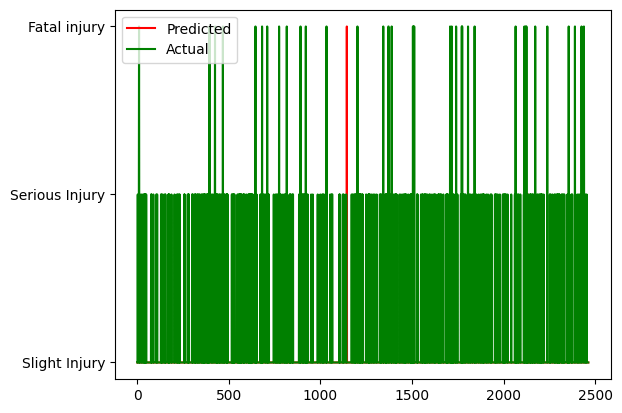

In [149]:
modelLR.fit(X_train, y_train)
y_pred = modelLR.predict(x_test)

# This is a plot for difference between the actual and predicted values
plt.plot(range(len(y_pred)), y_pred, label='Predicted', c='red')
plt.plot(range(len(y_test)), y_test, label='Actual', c='green')
plt.legend()
plt.show()

#### Decision Tree Classifier

In [91]:
modelDTC = Pipeline(steps = [('preprocessor',preprocessor),
                          ('Regression',DecisionTreeClassifier())])
modelDTC

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Number_of_vehicles_involved',
                                                   'Number_of_casualties']),
                                                 ('cat',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex_of_driver',
                                                   'Day_of_w...
                                                   'Types_of_Junction',
                                                   'Road_surface_type',
                                                   'Road_surface_conditions',
                                                   'Light_conditions',
                                                   'Weather_conditions',
                                                   'Type_of_collision',
                                                   'Vehicle_movement',
                                                   'Casualty_class',
                                                   'Sex_of_casualty',
                                                   'Age_band_of_casualty',
                                                   'Casualty_severity',
                                                   'Work_of_casuality',
                                                   'Fitness_of_casuality',
                                                   'Pedestrian_movement',
                                                   'Cause_of_accident'])])),
                ('Regression', DecisionTreeClassifier())])

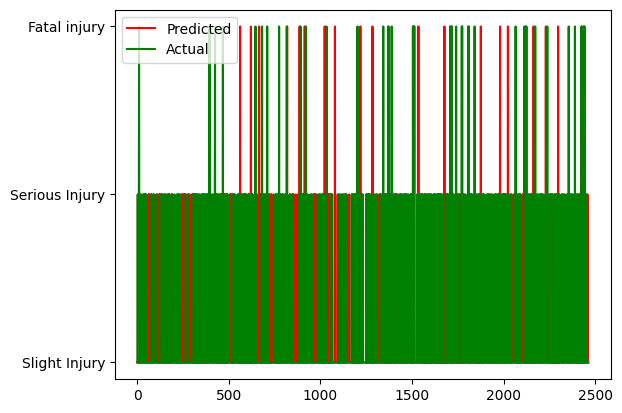

In [145]:
modelDTC.fit(X_train,y_train);
y_pred = modelDTC.predict(x_test)
plt.plot(range(len(y_pred)), y_pred, label='Predicted', c='red')
plt.plot(range(len(y_test)), y_test, label='Actual', c='green')
plt.legend()
plt.show()

#### Support Vector Machine (SVM)

In [97]:
modelSVM = Pipeline(steps = [('preprocessor',preprocessor),
                          ('Regression',SVC())])
modelSVM

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Number_of_vehicles_involved',
                                                   'Number_of_casualties']),
                                                 ('cat',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex_of_driver',
                                                   'Day_of_w...
                                                   'Road_allignment',
                                                   'Types_of_Junction',
                                                   'Road_surface_type',
                                                   'Road_surface_conditions',
                                                   'Light_conditions',
                                                   'Weather_conditions',
                                                   'Type_of_collision',
                                                   'Vehicle_movement',
                                                   'Casualty_class',
                                                   'Sex_of_casualty',
                                                   'Age_band_of_casualty',
                                                   'Casualty_severity',
                                                   'Work_of_casuality',
                                                   'Fitness_of_casuality',
                                                   'Pedestrian_movement',
                                                   'Cause_of_accident'])])),
                ('Regression', SVC())])

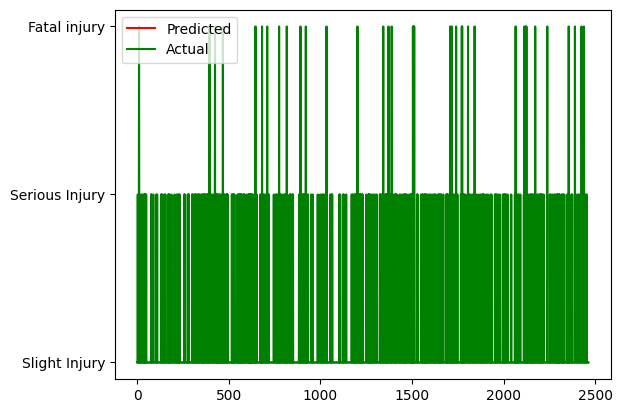

In [146]:
modelSVM.fit(X_train,y_train);
y_pred = modelSVM.predict(x_test)
plt.plot(range(len(y_pred)), y_pred, label='Predicted', c='red')
plt.plot(range(len(y_test)), y_test, label='Actual', c='green')
plt.legend()
plt.show()

#### K-Neighbors Classifier

In [101]:
modelKN = Pipeline(steps = [('preprocessor',preprocessor),
                          ('Regression',KNeighborsClassifier())])
modelKN

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Number_of_vehicles_involved',
                                                   'Number_of_casualties']),
                                                 ('cat',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex_of_driver',
                                                   'Day_of_w...
                                                   'Types_of_Junction',
                                                   'Road_surface_type',
                                                   'Road_surface_conditions',
                                                   'Light_conditions',
                                                   'Weather_conditions',
                                                   'Type_of_collision',
                                                   'Vehicle_movement',
                                                   'Casualty_class',
                                                   'Sex_of_casualty',
                                                   'Age_band_of_casualty',
                                                   'Casualty_severity',
                                                   'Work_of_casuality',
                                                   'Fitness_of_casuality',
                                                   'Pedestrian_movement',
                                                   'Cause_of_accident'])])),
                ('Regression', KNeighborsClassifier())])

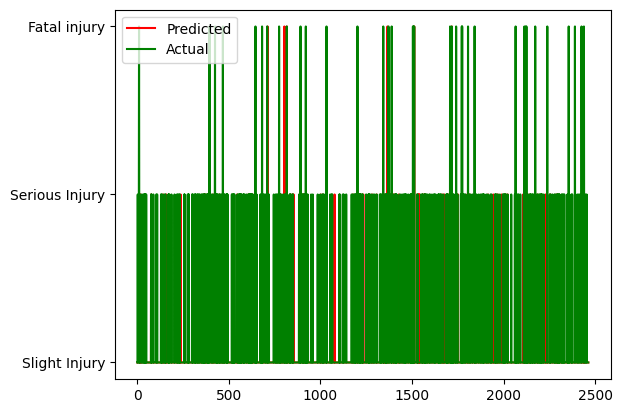

In [147]:
modelKN.fit(X_train,y_train);
y_pred = modelKN.predict(x_test)
plt.plot(range(len(y_pred)), y_pred, label='Predicted', c='red')
plt.plot(range(len(y_test)), y_test, label='Actual', c='green')
plt.legend()
plt.show()

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [155]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[   0    0   37]
 [   0    2  361]
 [   1    0 2063]]


In [154]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.84


In [118]:
# Here is for calculation the Precision & Recall for evaluation of the performance
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.56
Recall: 0.38


In [120]:
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.39


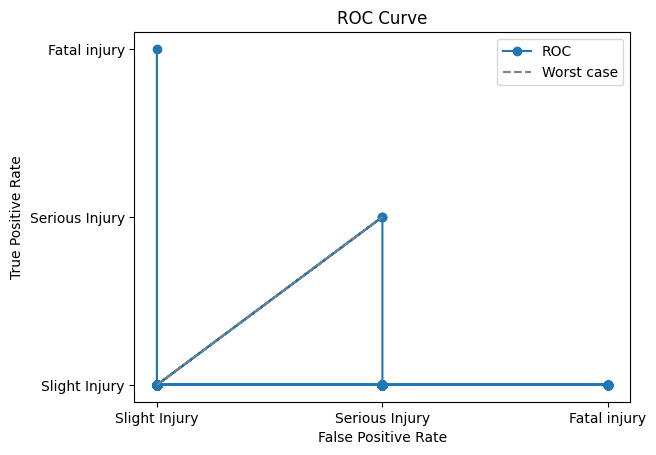

In [143]:
plt.plot(y_test, y_pred, 'o-', label='ROC')
plt.plot([0, 1], [0, 1], '--', color='grey', label='Worst case')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

As you can see the frist step load the dataset than clean up by delete the entire row and fill the missing values than divided the data into two groups the numerical and the categorical columns,
And create the visualization shows the distribution of data between the number of vehicles involved in the accident and the number of victims. In general, it is noted that when the number of vehicles involved increases, the number of victims can also increase, than traning where the x_train represents the features (independent variables) from the training dataset and y_train represents the target outcomes (dependent variables) from training dataset, And the model and create for each one Logistic Regression
Decision Tree Classifier
Support Vector Machine (SVM)
K-Neighbors Classifier

**For frist model Logistic Regression**
This model is underfitting because it fails to capture the capture the underlying patterns in the data, also too simple model or lacks complexity, it cannot represent the true relationship between features.
**Decision Tree Classifier**
This model also is underfitting the predicted values consistently fall short of the actual values across all three injury severity categories, indicating that the model does not capture the underlying trends in the data adequately.
**Support Vector Machine (SVM)**
This model is overfitting, it is means when the model learns the training data too well, In this case, the model seems to have memorized the training data for "Serious Injury" and "Fatal injury," but it fails to generalize to unseen data
**K-Neighbors Classifier**
This model also overfitting 
**Evaluation Techniques***
The Confusion Matrix it show the number of ture positive, also the false positive and false negative and predictions, The model correctly predicted 2 instances of Class 1 (Serious Injury) and 2063 instances of Class 2 (Slight Injury).
However, it failed to predict any instances of Class 0 (Fatal Injury).
And ***Accuracy*** precision measures the proportion of correctly predicted positive instances among all predicted positive instances, and in this case the accuracy is approximately 0.84, this means that model correctly predicts the outcome for about 84% of the instances and can be considered decent.
And for ***Precision & Recall*** The precision of 0.56 indicates that the model correctly identifies positive instances but may have some false positives, and recall of 0.38 suggests that the model misses some actual positive instances (high false negatives).
Finally ***F1 Score***

